In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from cue.analysis.analysis import bootstrap_ci
from cue.utils.plotting import *

In [4]:
style()

In [5]:
exp_data = pd.read_csv('../../data/hebb.csv')

In [6]:
exp_data['x'] = np.round(exp_data['x']).astype(int)

In [7]:
exp_data = exp_data.melt(id_vars='x', var_name='list', value_name='#recalls').dropna()

In [8]:
model_data = np.load('../../data/final/hebb.npz')
data1 = {k: v[model_data['extension'] == 'direct-assoc'] for k, v in model_data.items()}
data2 = {k: v[model_data['extension'] == 'forward-assoc'] for k, v in model_data.items()}

In [9]:
def plot_model_data(data, ax=None):
    if ax is None:
        ax = plt.gca()
        
    correct = np.sum(data['responses'] == data['lists'], axis=-1)
    m_correct = np.mean(correct, axis=0)
    
    ci_correct = np.array([bootstrap_ci(data, np.mean) for data in np.asarray(correct).T])
    ci_correct[:, 0] = m_correct - ci_correct[:, 0]
    ci_correct[:, 1] = ci_correct[:, 1] - m_correct
    
    x = np.arange(1, len(m_correct) + 1)
    a = x % 3 == 0
    b = x % 3 != 0
    
    ax.errorbar(x[b], m_correct[b], yerr=ci_correct[b, :].T, marker='o')
    ax.errorbar(x[a], m_correct[a], yerr=ci_correct[a, :].T, marker='o')

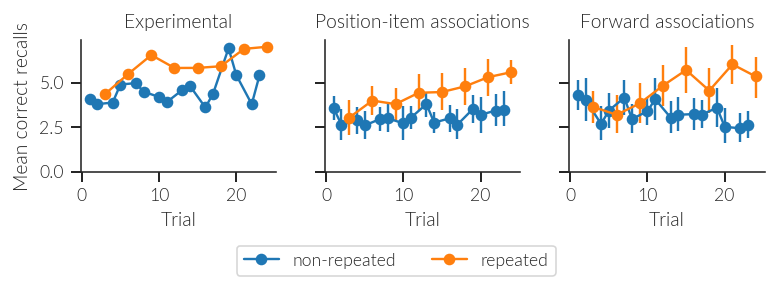

In [10]:
fig = plt.figure(figsize=(textwidth, row_height))

ax1 = fig.add_subplot(1, 3, 1)
for n, g in exp_data.groupby('list'):
    ax1.plot(g['x'], g['#recalls'], 'o-', label=n)

ax2 = fig.add_subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plot_model_data(data1, ax2)

ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plot_model_data(data2, ax3)

ax1.set_ylim(bottom=0)
ax1.set_ylabel("Mean correct recalls")
ax1.set_title("Experimental")
ax2.set_title("Position-item associations")
ax3.set_title("Forward associations")


fig.legend(
    *ax1.get_legend_handles_labels(), ncol=2,
    loc='upper center', bbox_to_anchor=(0.5, 0.25),
    bbox_transform=fig.transFigure,)

for ax in fig.axes:
    ax.label_outer()
    ax.set_xlabel("Trial")

sns.despine(fig)
fig.tight_layout(rect=(0., 0.2, 1., 1.))

In [11]:
save_tight_fig(fig, '../../../phd-thesis/figures/hebb.pdf')

In [83]:
def plot_model_data_rep011(data, ax=None):
    if ax is None:
        ax = plt.gca()
        
    correct = np.sum(data['responses'] == data['lists'], axis=-1)
    m_correct = np.mean(correct, axis=0)
    
    ci_correct = np.array([bootstrap_ci(data, np.mean) for data in np.asarray(correct).T])
    ci_correct[:, 0] = m_correct - ci_correct[:, 0]
    ci_correct[:, 1] = ci_correct[:, 1] - m_correct
    
    x = np.arange(1, len(m_correct) + 1)
    a = x % 3 == 0
    b = x % 3 == 1
    c = x % 3 == 2
    
    
    ax.errorbar(x[b], m_correct[b], yerr=ci_correct[b, :].T, marker='o',
                color=sns.color_palette()[0], label="non-repeated list")
    ax.errorbar(x[c], m_correct[c], yerr=ci_correct[c, :].T, marker='o',
                color=sns.color_palette()[1], label="repeated list")
    ax.errorbar(x[a], m_correct[a], yerr=ci_correct[a, :].T, marker='o',
                color=sns.color_palette('pastel')[1], label="repeated list")

In [84]:
model_data = np.load('../../data/final/hebb-rep011.npz')
data1 = {k: v[model_data['extension'] == 'direct-assoc'] for k, v in model_data.items()}
data2 = {k: v[model_data['extension'] == 'forward-assoc'] for k, v in model_data.items()}

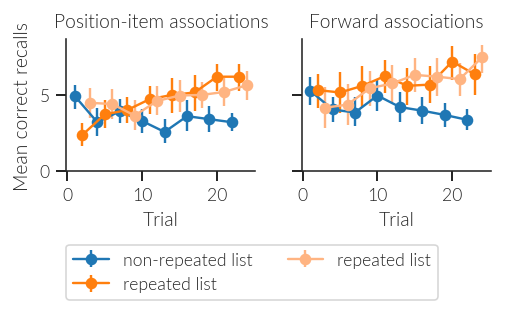

In [85]:
fig = plt.figure(figsize=(textwidth * 2. / 3., row_height))

ax1 = fig.add_subplot(1, 2, 1)
plot_model_data_rep011(data1, ax1)

ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plot_model_data_rep011(data2, ax2)

ax1.set_ylim(bottom=0)
ax1.set_ylabel("Mean correct recalls")
ax1.set_title("Position-item associations")
ax2.set_title("Forward associations")


fig.legend(
    *ax1.get_legend_handles_labels(), ncol=2,
    loc='upper center', bbox_to_anchor=(0.5, 0.25),
    bbox_transform=fig.transFigure,)

for ax in fig.axes:
    ax.label_outer()
    ax.set_xlabel("Trial")

sns.despine(fig)
fig.tight_layout(rect=(0., 0.2, 1., 1.))

In [86]:
save_tight_fig(fig, './hebb-rep011.pdf')

In [87]:
model_data = np.load('../../data/final/hebb-rand4.npz')
data1 = {k: v[model_data['extension'] == 'direct-assoc'] for k, v in model_data.items()}
data2 = {k: v[model_data['extension'] == 'forward-assoc'] for k, v in model_data.items()}

In [88]:
def plot_model_data_rand(data, ax=None):
    if ax is None:
        ax = plt.gca()
        
    cmp = data['responses'] == data['lists']
    correct_start_nonrep = cmp[:, [0, 1, 3, 4], :]
    correct_start_rep = cmp[:, 2:6:3, :]
    correct_end_nonrep = cmp[:, [18, 19, 21, 22], :]
    correct_end_rep = cmp[:, 20::3, :]
    
    for d, m, c, l in (
            (correct_start_nonrep, 'o', sns.color_palette()[0], "first trials, non-repeated lists"),
            (correct_start_rep, 's', sns.color_palette()[0], "first trials, repeated list"),
            (correct_end_nonrep, 'o', sns.color_palette()[1], "last trials, non-repeated lists"),
            (correct_end_rep, 's', sns.color_palette()[1], "last trials, repeated list")):
        correct = np.mean(d, axis=1)
        m_correct = np.mean(correct, axis=0)

        ci_correct = np.array([bootstrap_ci(data, np.mean) for data in np.asarray(correct).T])
        ci_correct[:, 0] = m_correct - ci_correct[:, 0]
        ci_correct[:, 1] = ci_correct[:, 1] - m_correct
   
        x = np.arange(1, len(m_correct) + 1)
        ax.errorbar(x, m_correct, yerr=ci_correct.T, marker=m, color=c, alpha=0.8, label=l)

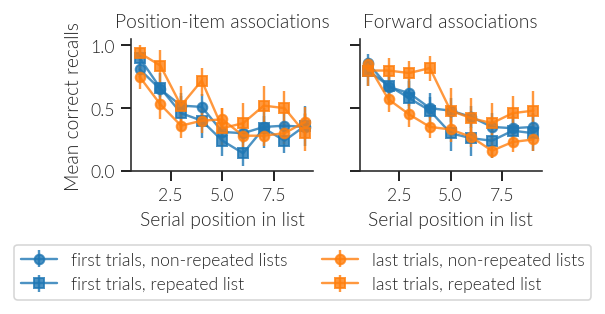

In [89]:
fig = plt.figure(figsize=(textwidth * 2. / 3., row_height))

ax1 = fig.add_subplot(1, 2, 1)
plot_model_data_rand(data1, ax1)

ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plot_model_data_rand(data2, ax2)

ax1.set_ylim(bottom=0)
ax1.set_ylabel("Mean correct recalls")
ax1.set_title("Position-item associations")
ax2.set_title("Forward associations")


fig.legend(
    *ax1.get_legend_handles_labels(), ncol=2,
    loc='upper center', bbox_to_anchor=(0.5, 0.25),
    bbox_transform=fig.transFigure,)

for ax in fig.axes:
    ax.label_outer()
    ax.set_xlabel("Serial position in list")

sns.despine(fig)
fig.tight_layout(rect=(0., 0.2, 1., 1.))

In [90]:
save_tight_fig(fig, './hebb-rand4.pdf')